In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
news = pd.read_csv(r"C:\Users\Pravachana\Documents\AIML_notes\TomTom test\fake-news\train.csv",encoding="UTF-8")

In [4]:
news_bkup = news.copy(deep=True)

In [5]:
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
news.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


Looking at dataset, we see 2 types of data can help to predict fake news.
1. title + text
2. auther

In [7]:
news.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
len(news.drop_duplicates())

20800

'label' column doesn't have any duplicate as well as length is same as original dataset, so we conclude 'label' column doesn't contain NaN

Looking at info, we have few null/NaN in few rows

In [10]:
len(news.title.unique())

19804

In [11]:
len(news.text.unique())

20387

In [12]:
news.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

Dataset have almost equal rows for both scenarios, so we can conclude its a fair/unbiased dataset.

In [13]:
news[news.title.isna() & news.text.isna()].count()

id        0
title     0
author    0
text      0
label     0
dtype: int64

None of the row has both title and text as NaN.

In [14]:
news['new_text']=news.title.fillna('') + ' ' +news.text.fillna('')
news

,id,title,author,text,label,new_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


Concatinating title and text into single new column 'new_text', as we are mostly intereted in word embedding.

In [15]:
#new_text = new_text.loc[new_text['new'].notna()]
news = news.loc[news['new_text'].notna()]
news

,id,title,author,text,label,new_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


Cross-check for any NaN row.

In [16]:
X=news.new_text
X.shape

(20800,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vect=CountVectorizer(stop_words='english')
vect.fit(X)

CountVectorizer(stop_words='english')

Bag of words excluding stop words.

In [19]:
X_transformed = vect.transform(X)
X_transformed.shape

(20800, 180872)

In [20]:
y=news.label
y.shape

(20800,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,train_size=0.7,test_size=0.3,random_state=100)

In [23]:
y_train.shape

(14559,)

In [24]:
X_train.shape

(14559, 180872)

In [25]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [26]:
#bnb = BernoulliNB()
mnb = MultinomialNB()

In [27]:
#bnb.fit(X_train,y_train)
mnb.fit(X_train,y_train)

MultinomialNB()

In [28]:
# predict class
#y_pred_class = bnb.predict(X_test)
y_pred_class = mnb.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# predict probability
#y_pred_proba =bnb.predict_proba(X_test)
y_pred_proba =mnb.predict_proba(X_test)
y_pred_proba

array([[9.99999879e-001, 1.21133592e-007],
       [1.00000000e+000, 3.12884353e-114],
       [1.00000000e+000, 3.31768444e-023],
       ...,
       [1.00000000e+000, 1.34377184e-082],
       [1.00000000e+000, 3.24608023e-024],
       [1.00000000e+000, 4.65734795e-073]])

In [30]:
# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9048076923076923

In [31]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[3084,   97],
       [ 497, 2562]], dtype=int64)

In [32]:
false_positive_rate,true_positive_rate,threshold=metrics.roc_curve(y_test,y_pred_class)

In [33]:
roc_auc=metrics.auc(false_positive_rate,true_positive_rate)
roc_auc

0.9035175243166484

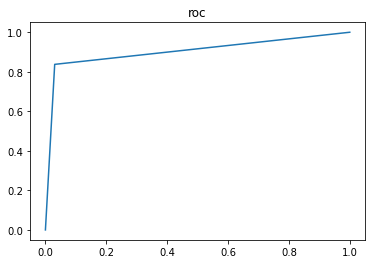

In [34]:
import matplotlib.pyplot as plt
plt.xlabel=('false positive rate')
plt.ylabel=('true_positive_rate')
plt.title('roc')
plt.plot(false_positive_rate,true_positive_rate)

So we have one model ready now with title and text columns. Lets build second model with author details.

In [35]:
news2=news_bkup.copy(deep=True)

In [36]:
news2=news2.loc[news2['author'].notna()]
news2.shape

(18843, 5)

In [37]:
news2=news2[news2['label'].notna()]
news2.shape

(18843, 5)

In [38]:
len(news2.author.unique())

4201

In [39]:
#news.author.loc[news['label'] == 0].isin(news.author.loc[df['label'] == 1]).value_counts()
news2_0 = news2[news2['label'] == 0]
news2_1 = news2[news2['label'] == 1]
#len(news_0.author.drop_duplicates())
#len(news_1.author.drop_duplicates())

In [40]:
news2_0['author'].drop_duplicates().isin(news2_1['author'].drop_duplicates()).value_counts()
#news_0[news_0['author'].isin(news_1['author'])]

False    2220
True        5
Name: author, dtype: int64

We can see, almost all authors fall into single category i.e. 0 or 1 label. So author column will be definitely help in model performance and influence.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X2=pd.get_dummies(news2['author'],drop_first=True)
#X2=pd.get_dummies(X_test,drop_first=True)

In [43]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,news2['label'],random_state=100)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logrec = LogisticRegression()

In [46]:
logrec.fit(X2_train,y2_train)

LogisticRegression()

In [47]:
y2_pred=logrec.predict(X2_test)
y2_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
print(metrics.accuracy_score(y2_test, y2_pred))

0.9284652939927829


In [49]:
metrics.confusion_matrix(y2_test,y2_pred)

array([[2636,    0],
       [ 337, 1738]], dtype=int64)

In [50]:
false_positive_rate,true_positive_rate,threshold=metrics.roc_curve(y2_test,y2_pred)
roc_auc=metrics.auc(false_positive_rate,true_positive_rate)
roc_auc

0.9187951807228916

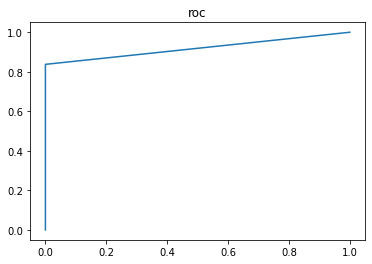

In [51]:
import matplotlib.pyplot as plt
plt.xlabel=('false_positive_rate')
plt.ylabel=('true_positive_rate')
plt.title('roc')
plt.plot(false_positive_rate,true_positive_rate)

So we can see, model one using Bernoulli Naive Bayes algorithm, we get 90% accuracy on test dataset. Here input was bag of words in title + text.

Whereas, when we build Logistic regression model, it gave 92% accuracy on test dataset. Here input was auther details.

Still 'auther' column is something we cannot reply on much to classify any document. On the other hand, model performing significantly well, so cannot be ignored. 

So I would suggest to weight 90% on probabilities predicted by model1 (MultinomialNB) + 10% weight on probabilites predicted thru model2 (Logistic regression). This addition would predict best probability and classify the document.

In [52]:
test_data=pd.read_csv(r"C:\Users\Pravachana\Documents\AIML_notes\TomTom test\fake-news\test.csv",encoding="UTF-8")

In [53]:
test_data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [54]:
test_data['new_text']=test_data.title.fillna('') + ' ' +test_data.text.fillna('')

In [55]:
test_data = test_data.loc[test_data['new_text'].notna()]

In [56]:
X3 = test_data['new_text']

In [57]:
#vect = CountVectorizer(stop_words='english')
#vect.fit(X3)

In [58]:
X3_transformed = vect.transform(X3)

In [59]:
y3_pred = mnb.predict(X3_transformed)
y3_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [60]:
y31_pred = mnb.predict_proba(X3_transformed)

In [61]:
X4 = pd.get_dummies(test_data['author'],drop_first=True)
#X5 = X4.reindex(labels=X2.columns,axis=1)
#X5=X5.dropna()
X4.shape


(5200, 1731)

In [62]:
X6 = pd.DataFrame(np.zeros((5200, 2469)))
X6.shape

(5200, 2469)

In [63]:
X7=pd.concat([X4,X6],axis=1)
X7

,-NO AUTHOR-,184 U.S. generals and admirals endorse Trump for Commander-In-Chief — Fellowship of the Minds | kommonsentsjane,A. F. Branco,A. Griffee,A. Maren,A. O. Scott,A.O. Scott,ACT I,AFP EastNews,AP,...,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5196,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5197,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5198,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
y5_pred = logrec.predict_proba(X7)
y5_pred

array([[0.43351753, 0.56648247],
       [0.54139764, 0.45860236],
       [0.36333882, 0.63666118],
       ...,
       [0.43351753, 0.56648247],
       [0.54139764, 0.45860236],
       [0.43351753, 0.56648247]])

In [65]:
y6_pred = logrec.predict(X7)
y6_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [66]:
final = .9 * y31_pred + .1 * y5_pred
final


array([[0.94335175, 0.05664825],
       [0.05413976, 0.94586024],
       [0.03633388, 0.96366612],
       ...,
       [0.94335175, 0.05664825],
       [0.05413976, 0.94586024],
       [0.94335175, 0.05664825]])

In [67]:
final.shape

(5200, 2)

In [68]:
n = 1
arr1=np.empty([0])
print(arr1.shape)
for i in range(final.shape[0]):
    if final[i,0] > final[i,1]:
        arr1=np.append(arr1,[0])
    else:
        arr1=np.append(arr1,[1])
arr1

(0,)


array([0., 1., 1., ..., 0., 1., 0.])

In [69]:
test_data['pred_label'] = arr1.tolist()
test_data

,id,title,author,text,new_text,pred_label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse...",0.0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1.0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...,1.0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ...",0.0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...,1.0
...,...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,The Bangladeshi Traffic Jam That Never Ends - ...,0.0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,John Kasich Signs One Abortion Bill in Ohio bu...,0.0
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,"California Today: What, Exactly, Is in Your Su...",0.0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,300 US Marines To Be Deployed To Russian Borde...,1.0


In [70]:
test_data_final = test_data[['id','pred_label']]

In [71]:
test_data_final.to_csv(r"C:\Users\Pravachana\Documents\AIML_notes\TomTom test\fake-news\submit1.csv",index=False)